<a href="https://colab.research.google.com/github/PKpacheco/uml-assignment2_dbscan/blob/main/Assignment_3_DBSCAN_UML_Paola_Pacheco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Unsupervised Machine Learning

Paola Katherine Pacheco - 0374446


1.a)
Load patient_priority.csv into a pandas dataframe. Drop the 'triage' column and print out the header. Use pandas.DataFrame.describe to summarize the data. Using markdown, explain the meaning of each column and make observations about the dataset.


In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors




In [2]:
# read the file
df_github_url = "https://raw.githubusercontent.com/PKpacheco/uml-assignment2_dbscan/main/patient_priority.csv"
df = pd.read_csv(df_github_url)
df

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.00,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.00,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.00,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.00,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.00,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,5105,80.0,0.0,0.0,111.0,153.0,166.0,0.0,83.75,31.0,108.0,18.6,0.467386,1.0,0.0,Urban,never smoked,yellow
6958,5106,81.0,0.0,0.0,123.0,157.0,160.0,0.0,125.20,23.0,89.0,40.0,0.467386,0.0,0.0,Urban,never smoked,yellow
6959,5107,81.0,0.0,0.0,127.0,185.0,141.0,0.0,82.99,41.0,95.0,30.6,0.467386,0.0,0.0,Rural,never smoked,yellow
6960,5108,51.0,1.0,0.0,123.0,161.0,162.0,0.0,166.29,34.0,93.0,25.6,0.467386,0.0,0.0,Rural,formerly smoked,green


1.b) Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values. Use pandas.DataFrame.duplicates to check for duplicate entries. Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. Use markdown to make observations and explain what you have done.


Change some data types, because there are wrong dtypes in those columns below: ( they are using float 64 instead of int)

    'age': int,
    'chest pain type': int,
    'blood pressure' : int,
    'cholesterol': int,
    'max heart rate': int,
    'skin_thickness': int,

In [3]:
dtypes = {
    'age': int,
    'chest pain type': int,
    'blood pressure' : int,
    'cholesterol': int,
    'max heart rate': int,
    'skin_thickness': int,
}
df = pd.read_csv(df_github_url, dtype=dtypes)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6962 non-null   int64  
 1   age                6962 non-null   int64  
 2   gender             6961 non-null   float64
 3   chest pain type    6962 non-null   int64  
 4   blood pressure     6962 non-null   int64  
 5   cholesterol        6962 non-null   int64  
 6   max heart rate     6962 non-null   int64  
 7   exercise angina    6962 non-null   float64
 8   plasma glucose     6962 non-null   float64
 9   skin_thickness     6962 non-null   int64  
 10  insulin            6962 non-null   float64
 11  bmi                6962 non-null   float64
 12  diabetes_pedigree  6962 non-null   float64
 13  hypertension       6962 non-null   float64
 14  heart_disease      6962 non-null   float64
 15  Residence_type     6962 non-null   object 
 16  smoking_status     6962 

Drop the first column, 'unname' there is no reason for double index

Also, remove the triage colum, we don't need this column

In [5]:
# Drop the 'unname' column, looks like index
df = df.drop('Unnamed: 0', axis=1)

In [6]:
# Drop the 'triage' column
df = df.drop('triage', axis=1)

# Print the updated header
print(df.columns)

Index(['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'Residence_type', 'smoking_status'],
      dtype='object')


In [7]:
# Print the header
print(df.columns)

Index(['age', 'gender', 'chest pain type', 'blood pressure', 'cholesterol',
       'max heart rate', 'exercise angina', 'plasma glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'Residence_type', 'smoking_status'],
      dtype='object')


Drop NaN values from dataset

In [8]:
df = df.dropna()

In [49]:
df.head()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,40,1.0,2,140,294,172,0.0,108.0,43,92.0,19.0,0.467386,0.0,0.0,1,0,1,0
1,49,0.0,3,160,180,156,0.0,75.0,47,90.0,18.0,0.467386,0.0,0.0,1,0,1,0
2,37,1.0,2,130,294,156,0.0,98.0,53,102.0,23.0,0.467386,0.0,0.0,1,0,1,0
3,48,0.0,4,138,214,156,1.0,72.0,51,118.0,18.0,0.467386,0.0,0.0,1,0,1,0
4,54,1.0,3,150,195,156,0.0,108.0,90,83.0,21.0,0.467386,0.0,0.0,1,0,1,0


In [9]:
# Summarize the data
description = df.describe()

# Display the summary statistics
print(description)

               age       gender  chest pain type  blood pressure  cholesterol  \
count  6961.000000  6961.000000      6961.000000     6961.000000  6961.000000   
mean     57.447924     0.531964         0.529091      109.633530   184.714840   
std      11.904525     0.499013         1.253865       21.534376    32.011288   
min      28.000000     0.000000         0.000000       60.000000   150.000000   
25%      48.000000     0.000000         0.000000       92.000000   164.000000   
50%      56.000000     1.000000         0.000000      111.000000   179.000000   
75%      66.000000     1.000000         0.000000      127.000000   192.000000   
max      82.000000     1.000000         4.000000      165.000000   294.000000   

       max heart rate  exercise angina  plasma glucose  skin_thickness  \
count     6961.000000      6961.000000     6961.000000     6961.000000   
mean       163.500359         0.061773       98.387828       56.809079   
std         15.458827         0.240760       28.

Columns

* age: The age of the patient.

* gender: The gender of the patient

* chest pain type: The type of chest pain the patient had.

* blood pressure:  blood pressure of the patient

* cholesterol: The cholesterol level of the patient

* max heart rate:  maximum heart rate reached by the patient during an exercise tes/

* exercise angina: variable to indicate if the patient have exercise angina

* plasma glucose: The plasma glucose level

* skin_thickness: Skin thickness

* insulin: The insulin level of each patient

* bmi:  Body Mass Index (BMI)

* diabetes_pedigree:diabetes pedigree function

* hypertension: if the patient has hypertension or no

* heart_disease:if the patient has heart disease

* Residence_type: The type of residence of the patient

* smoking_status:  smoking status of the patient

Quantitative comments:


`Age Distribution:`

The age of patients in the df have a range from 28 to 82 years and the mean is approximately 57.45. Most of the patientes are in between 48 and 66.

`Gender`

There are almost same percentage for men than women, we can't define the genders because there is no documentation about that, only numeric values 0 and 1

`Blood Pressure`:

The values are in between 60 to 165 and the mean is 109.63, it means it's a regular blood pressure.

`Cholesterol:`

The values are in between 150 to 294 , with a mean of approximately 184.
The mean is high.

`BMI (Body Mass Index)`:

BMI values range from 10.30 to 66.80, with a mean of approximately 27.19, it's a acceptable value for BMI


`Hypertension`:

Approximately 7% of the patients in the dataset have hypertension, it means most of them don't have.

`Heart Disease:`

About 4% of the patients have heart disease, most of them don't have

In [10]:
# Check data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6961
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6961 non-null   int64  
 1   gender             6961 non-null   float64
 2   chest pain type    6961 non-null   int64  
 3   blood pressure     6961 non-null   int64  
 4   cholesterol        6961 non-null   int64  
 5   max heart rate     6961 non-null   int64  
 6   exercise angina    6961 non-null   float64
 7   plasma glucose     6961 non-null   float64
 8   skin_thickness     6961 non-null   int64  
 9   insulin            6961 non-null   float64
 10  bmi                6961 non-null   float64
 11  diabetes_pedigree  6961 non-null   float64
 12  hypertension       6961 non-null   float64
 13  heart_disease      6961 non-null   float64
 14  Residence_type     6961 non-null   object 
 15  smoking_status     6961 non-null   object 
dtypes: float64(8), int64(6),

Drop duplicated values from df

In [11]:
# Check for duplicate entries
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [12]:
# Drop duplicate rows
df = df.drop_duplicates()

1.c)Use pandas.get_dummies to one-hot-encode the two columns with string data.


In [13]:
df = pd.get_dummies(df, columns=['Residence_type', 'smoking_status'], drop_first=True)


In [14]:
df.head()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,40,1.0,2,140,294,172,0.0,108.0,43,92.0,19.0,0.467386,0.0,0.0,1,0,1,0
1,49,0.0,3,160,180,156,0.0,75.0,47,90.0,18.0,0.467386,0.0,0.0,1,0,1,0
2,37,1.0,2,130,294,156,0.0,98.0,53,102.0,23.0,0.467386,0.0,0.0,1,0,1,0
3,48,0.0,4,138,214,156,1.0,72.0,51,118.0,18.0,0.467386,0.0,0.0,1,0,1,0
4,54,1.0,3,150,195,156,0.0,108.0,90,83.0,21.0,0.467386,0.0,0.0,1,0,1,0


1.d) Use seaborn.heatmap to display the correlation matrix of the features. Use seaborn.pairplot to generate scatter plots and histograms. Use markdown to make observations.


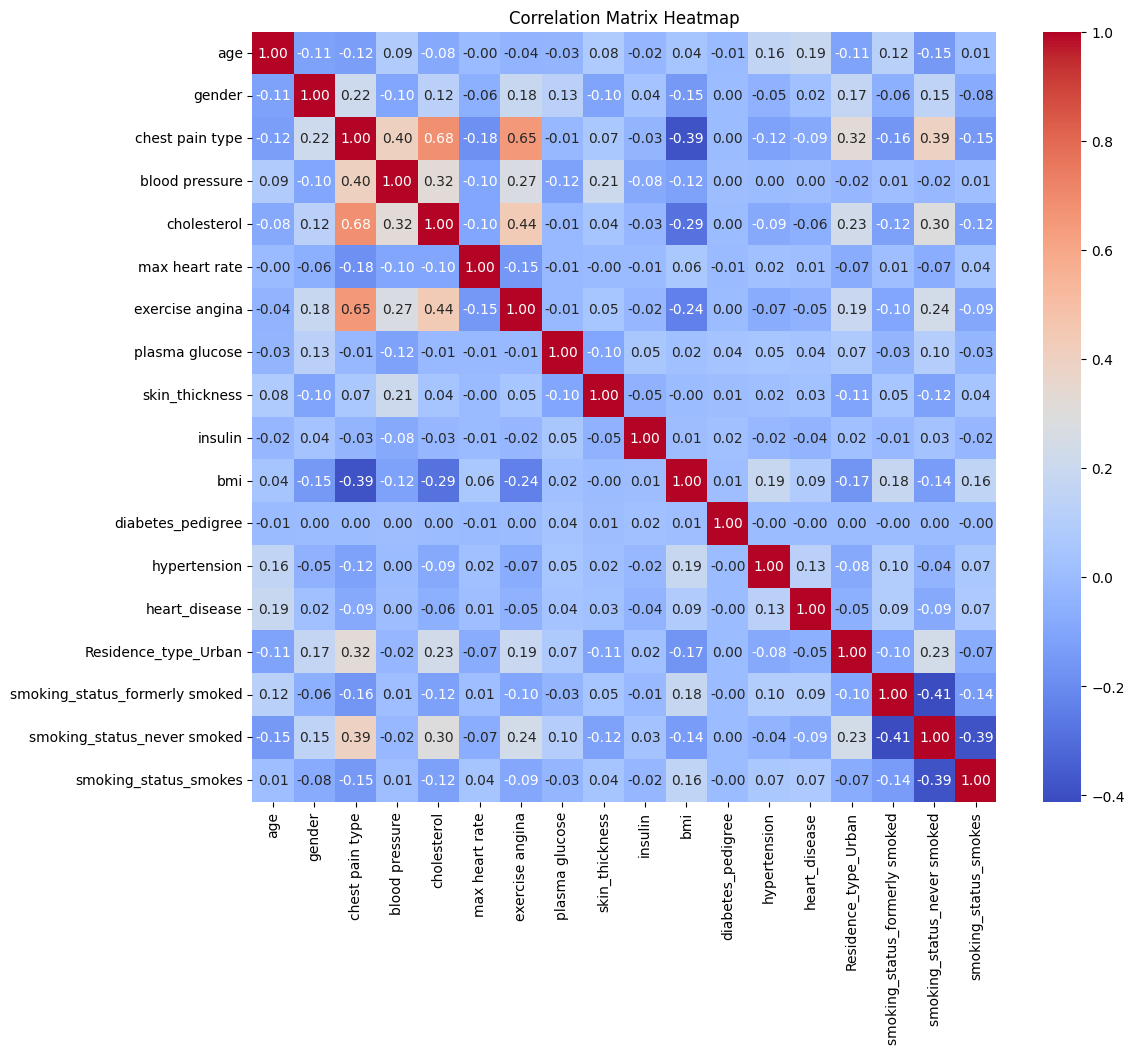

In [15]:
correlation_matrix = df.corr()

# heat map
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


We noticed that there is no relationship between gender and other columns, which means that gender does not change the predisposition to diseases, weight, chest pain, cholesterol, among others.

Chest pain is related to cholesterol and exercise angina, a person with high cholesterol is likely to have chest pain.

Age, hypertension and heart disease have a positive correlation, this may be due to the older you are, the more likely you are to have heart disease and hypertension.

smoking status shows relationship with chest pain, perhaps indicates that they are related, smoking and pain

In [16]:
# #  pairplot
# sns.pairplot(df, diag_kind='hist', hue='heart_disease')
# plt.suptitle("Pairplot of Features")
# plt.show()


2.a)Use sklearn.preprocessing.MinMaxScaler to scale the data. Print the header.




In [17]:
# get the reader for csv_data
header = df.columns

# init the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df)

# create new df with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=header)

# print  header of the new scaled df
print(scaled_df.head())

        age  gender  chest pain type  blood pressure  cholesterol  \
0  0.222222     1.0             0.50        0.761905     1.000000   
1  0.388889     0.0             0.75        0.952381     0.208333   
2  0.166667     1.0             0.50        0.666667     1.000000   
3  0.370370     0.0             1.00        0.742857     0.444444   
4  0.481481     1.0             0.75        0.857143     0.312500   

   max heart rate  exercise angina  plasma glucose  skin_thickness   insulin  \
0         0.53125              0.0        0.367528        0.282051  0.122222   
1         0.28125              0.0        0.138171        0.333333  0.100000   
2         0.28125              0.0        0.298026        0.410256  0.233333   
3         0.28125              1.0        0.117320        0.384615  0.411111   
4         0.28125              0.0        0.367528        0.884615  0.022222   

        bmi  diabetes_pedigree  hypertension  heart_disease  \
0  0.153982           0.166262           

Due to the large number of clusters (63) using the scaled_df ( full dataset) I decided to reduce the number of features and choose only those that are important in the medical care decision and use this selected_features to run the model and hyperparameters



In [75]:
selected_features = scaled_df[['age', 'blood pressure','cholesterol','bmi' , 'hypertension', 'heart_disease' ]]

Calculate the Epsilon ( maximum distance between 2 data points) using different K values.


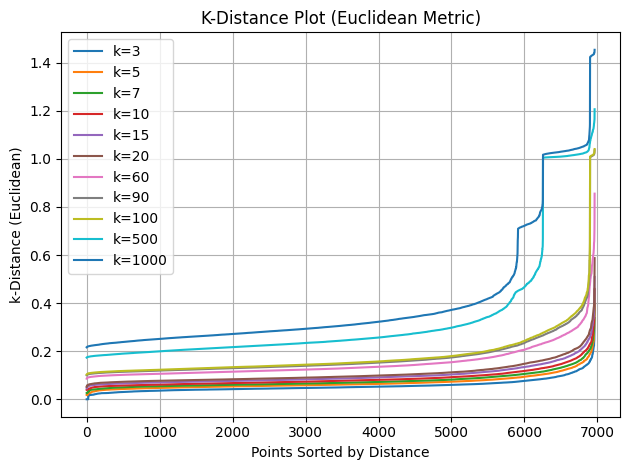

In [76]:
# random kvalues
k_values = [3, 5, 7, 10, 15, 20, 60, 90, 100, 500, 1000]

# Calculate the pairwise distances using Euclidean distance
distances_euclidean, _ = NearestNeighbors(n_neighbors=max(k_values), metric='euclidean').fit(selected_features).kneighbors(selected_features)

for k in k_values:
    k_distances = distances_euclidean[:, k - 1]
    k_distances_sorted = np.sort(k_distances)
    plt.plot(range(1, len(k_distances_sorted) + 1), k_distances_sorted, label=f'k={k}')
plt.xlabel("Points Sorted by Distance")
plt.ylabel("k-Distance (Euclidean)")
plt.title("K-Distance Plot (Euclidean Metric)")
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()


Based on the plot,  we can use 'knee' test to observe that most of values for K options are  around 0.1 and 0.5, it means it's the best epsilon value.

I'll calculate using different code, to be sure the epsilon value.



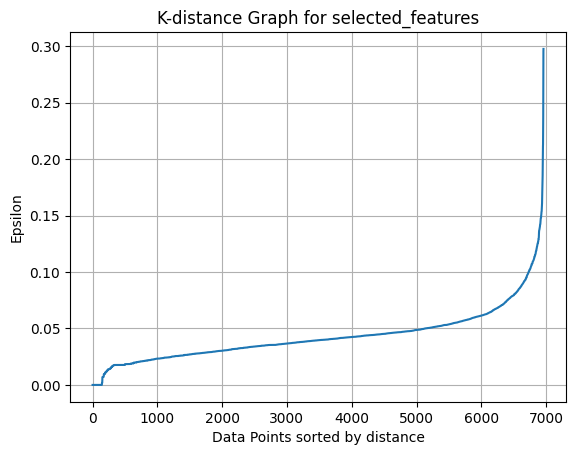

In [77]:
nn = NearestNeighbors(n_neighbors=4)
nbrs = nn.fit(selected_features)
distances, indices = nbrs.kneighbors(selected_features)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph for selected_features')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.grid()
plt.show()

Based on the plot above, I noticed the value of epsilon is around 0.30

In [78]:
# calculate dimensionality for selected_features
dimensionality = selected_features.shape[1]
print(dimensionality)

6


I decided to calculate the min points to create a dense region, I'll use the scaled_df and selected_features to compare.

The results are 9 and 19, I'll use this inside the DBSCAN model

The min_points have a formula, so I decided to use as well and create a list of min_point values in the DBSCAN model.


MinPts >= Dimensions * 2 --> 7* 2 = 14


OR


MinPts >= Dimensions + 1 --> 7+1 = 8

In [79]:

# # calculate min points in a dense region
# D - num of clumns (features)
D = len(selected_features.columns)

# use the rule of thumb
minPts = D + 1
minPts = max(minPts, 3)
print("Min Points according to the code is :", minPts)

Min Points according to the code is : 7


I have 8, 14 as a min_points, I'll use in the model all values

2.b) Use sklearn.cluster.DBSCAN to cluster the data. Create at least 10 different models with different choices for hyperparameters: eps, min_samples, metric, and p. Calculate the silhouette score for each and tabulate the results.

For the hyperparameters:

* Epsilon values: between 0.1 and 1.0, according to the plot before, we can see the distance it's around 0.1 and 0.6, also 0.30 to 0.35.

* min_samples: 2, 3, 8,14, acording to the code before and plots before

* metrics = 'euclidean' and  'manhattan'

* p_values = 1 and 2

In [80]:
# Create a list of all the hyperparameters

epsilon_values = [0.1, 0.3, 0.35, 1.0]
min_samples_values = [2, 3, 8, 14]
metrics = ['euclidean', 'manhattan']
p_values = [1, 2]

results_df = pd.DataFrame(columns=['Epsilon', 'Min_Samples', 'Metric', 'P', 'Silhouette Score'])

# max_models = 30

# model_count = 0

for eps in epsilon_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            for p in p_values:
              # if model_count >= max_models:
              #   break

              dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, p=p)
              dbscan_labels = dbscan.fit_predict(selected_features)
              # silhouette score
              if len(set(dbscan_labels)) > 1:
                  silhouette_avg = silhouette_score(selected_features, dbscan_labels)
              else:
                  silhouette_avg = -1

              # append results to a df
              results_df = results_df.append({
                  'Epsilon': eps,
                  'Min_Samples': min_samples,
                  'Metric': metric,
                  'P': p,
                  'Silhouette Score': silhouette_avg
              }, ignore_index=True)
              # model_count += 1


<ipython-input-80-06209245252f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-80-06209245252f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-80-06209245252f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-80-06209245252f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-80-06209245252f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

The row with the highest silhouette score represents the best  combination for DBSCAN .

In [81]:
# print results in tabular form
print(results_df)

    Epsilon Min_Samples     Metric  P  Silhouette Score
0       0.1           2  euclidean  1         -0.221792
1       0.1           2  euclidean  2         -0.221792
2       0.1           2  manhattan  1         -0.523593
3       0.1           2  manhattan  2         -0.523593
4       0.1           3  euclidean  1         -0.161490
..      ...         ...        ... ..               ...
59      1.0           8  manhattan  2          0.551931
60      1.0          14  euclidean  1          0.551931
61      1.0          14  euclidean  2          0.551931
62      1.0          14  manhattan  1          0.551931
63      1.0          14  manhattan  2          0.551931

[64 rows x 5 columns]


Get the best model and labels

In [82]:
# get the best model
results_df.sort_values(by='Silhouette Score', ascending=False, inplace=True)

best_eps = results_df.iloc[0]['Epsilon']
best_min_samples = results_df.iloc[0]['Min_Samples']
best_metric = results_df.iloc[0]['Metric']
best_p = results_df.iloc[0]['P']
best_silhouette_score = results_df.iloc[0]['Silhouette Score']

# Print the best model
print(f"Best : Epsilon={best_eps}, Min_Samples={best_min_samples}, Metric={best_metric}, P={best_p}")
print(f"Best Silhouette Score: {best_silhouette_score}")

#save best model
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples, metric=best_metric, p=best_p)
best_dbscan_labels = best_dbscan.fit_predict(selected_features)



Best : Epsilon=0.35, Min_Samples=2, Metric=euclidean, P=1
Best Silhouette Score: 0.5519313633640314


We can observe that the Manhattan distance generates negative values, that is, this distance is not suitable for the data set.

The higher values for min_samples result in a better silhouette score.


The best model has a highest Silhouette Score(0.4839767675068349)

**Epsilon (eps)**: 0.35

**Min_Samples**: 2

**Metric**: Euclidean

**P:** 1

In [83]:
print(best_dbscan)

DBSCAN(eps=0.35, min_samples=2, p=1)


In [84]:
print(len(best_dbscan_labels))

6961


Next code it's for calculate the core points, the central points in each cluster

In [85]:
# core points
sample_cores=np.zeros_like(best_dbscan_labels,dtype=bool)

sample_cores[best_dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(best_dbscan_labels))- (1 if -1 in best_dbscan_labels else 0)
print('No of clusters:',n_clusters)

No of clusters: 4


In [86]:
#identify the clusters
clusters = best_dbscan_labels

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 4
Number of noise points: 0
Number of points per cluster:
Cluster 0 : 6252
Cluster 1 : 211
Cluster 2 : 434
Cluster 3 : 64


After changing for selected_features I got a better  number of cluster :  4

2.c)Select the best model for the use case and justify your choice in markdown.






Based on the result from `results_df` these are the best models  and silhouette scores:


```
DBSCAN(eps=0.35, min_samples=2,p=1)
```
*   Epsilon=0.35 , Min_Samples=2 Metric= euclidean, P=1

the number of clusters is 4

3.a) Based on your analysis in step 1, choose a pair of columns and generate a scatter plot of the data. Use the model predictions to colour the points according to the cluster they belong to. Use markdown to comment on the plot.


In [87]:
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6961 entries, 0 to 6960
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             6961 non-null   float64
 1   blood pressure  6961 non-null   float64
 2   cholesterol     6961 non-null   float64
 3   bmi             6961 non-null   float64
 4   hypertension    6961 non-null   float64
 5   heart_disease   6961 non-null   float64
dtypes: float64(6)
memory usage: 326.4 KB


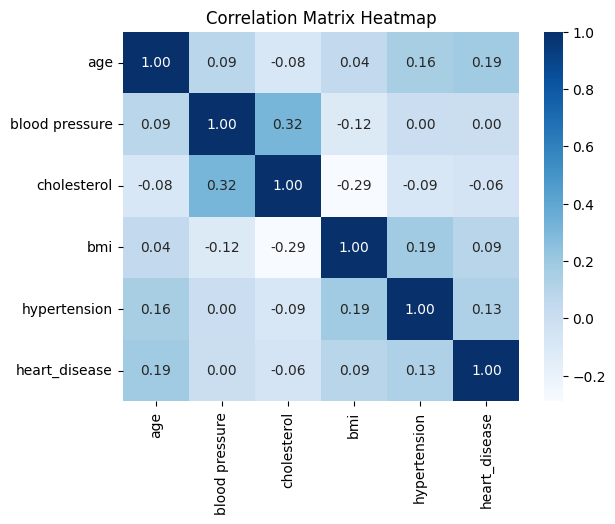

In [88]:
correlation_matrix_selected = selected_features.corr()

# heat map

sns.heatmap(correlation_matrix_selected, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


Create the combinations for plot

In [92]:
# columns
#Combination 0
x_column = selected_features['age']
y_column = selected_features['cholesterol']

#Combination 1
x_column_1 = selected_features['blood pressure']
y_column_1 = selected_features['cholesterol']

# Combination 2
x_column_2 = selected_features['age']
y_column_2 = selected_features['heart_disease']

# Combination 3
x_column_3 = selected_features['bmi']
y_column_3 = selected_features['hypertension']

# Combination 4
x_column_4 = selected_features['hypertension']
y_column_4 = selected_features['age']

# Combination 5
x_column_5 = selected_features['hypertension']
y_column_5 = selected_features['cholesterol']






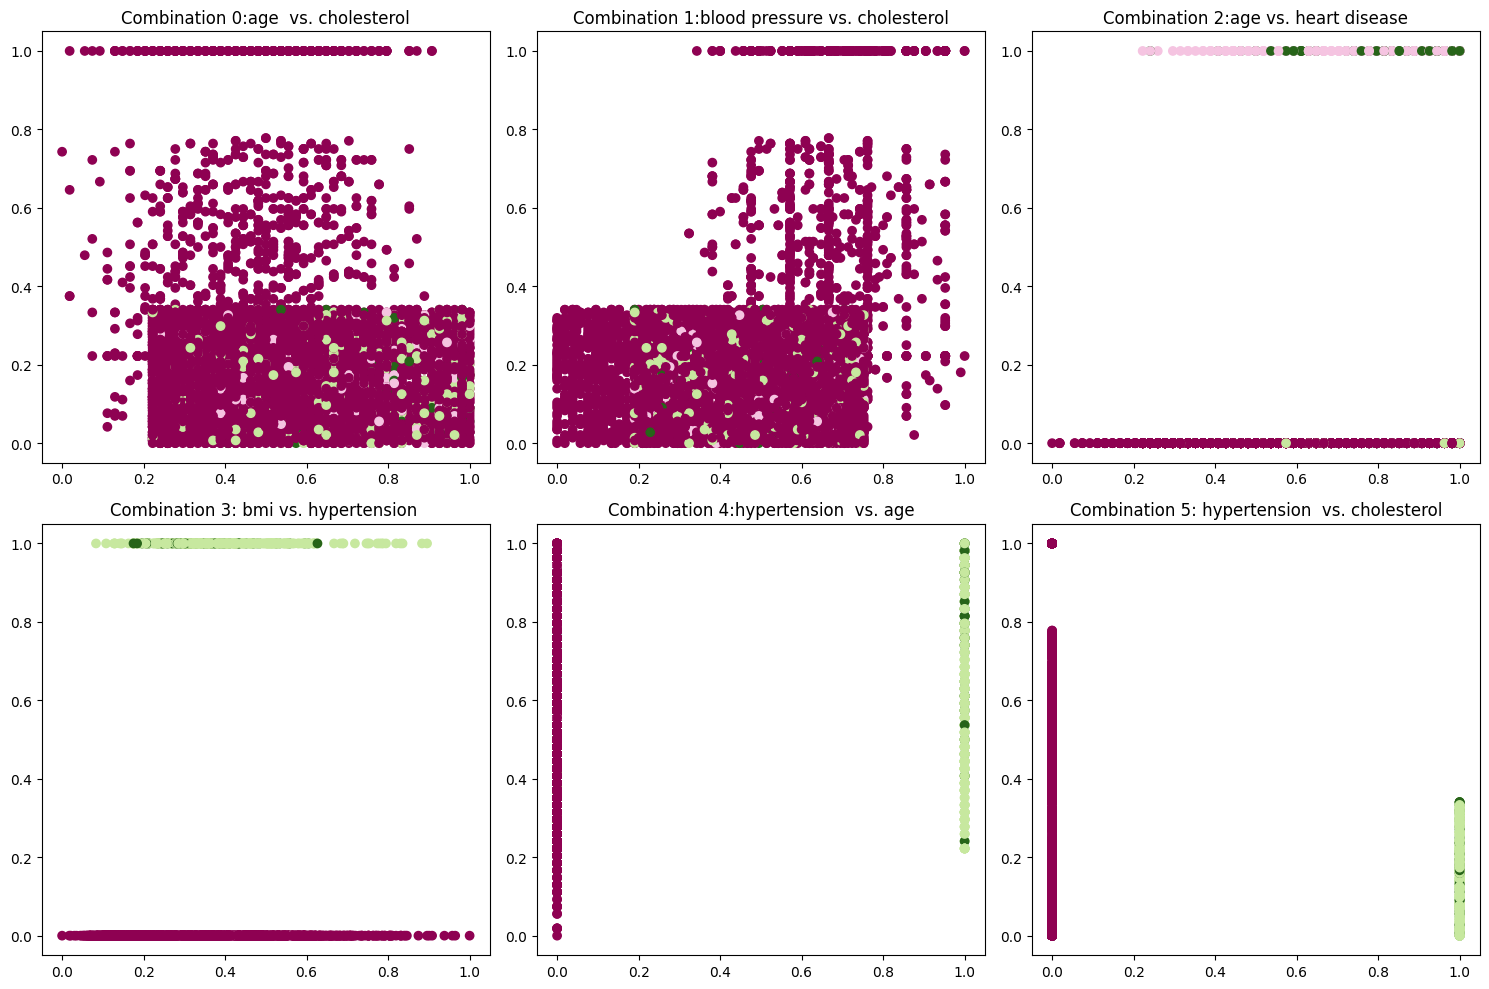

In [93]:
labels = best_dbscan_labels
title = "DBSCAN Clustering Results"
cmap='PiYG'
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Scatter Plot 1
axs[0, 0].scatter(x_column, y_column, c=labels, cmap=cmap)
axs[0, 0].set_title("Combination 0:age  vs. cholesterol")

# Scatter Plot 2
axs[0, 1].scatter(x_column_1, y_column_1, c=labels, cmap=cmap)
axs[0, 1].set_title("Combination 1:blood pressure vs. cholesterol")

# Scatter Plot 3
axs[0, 2].scatter(x_column_2, y_column_2, c=labels, cmap=cmap)
axs[0, 2].set_title("Combination 2:age vs. heart disease")

# Scatter Plot 4
axs[1, 0].scatter(x_column_3, y_column_3, c=labels, cmap=cmap)
axs[1, 0].set_title("Combination 3: bmi vs. hypertension ")

# Scatter Plot 5
axs[1, 1].scatter(x_column_4, y_column_4, c=labels, cmap=cmap)
axs[1, 1].set_title("Combination 4:hypertension  vs. age")

# Scatter Plot 6
axs[1, 2].scatter(x_column_5, y_column_5, c=labels, cmap=cmap)
axs[1, 2].set_title("Combination 5: hypertension  vs. cholesterol")


plt.tight_layout()
plt.show()


3.b)Generate a histogram that shows the number of elements in each cluster. Use markdown to comment on the histogram.

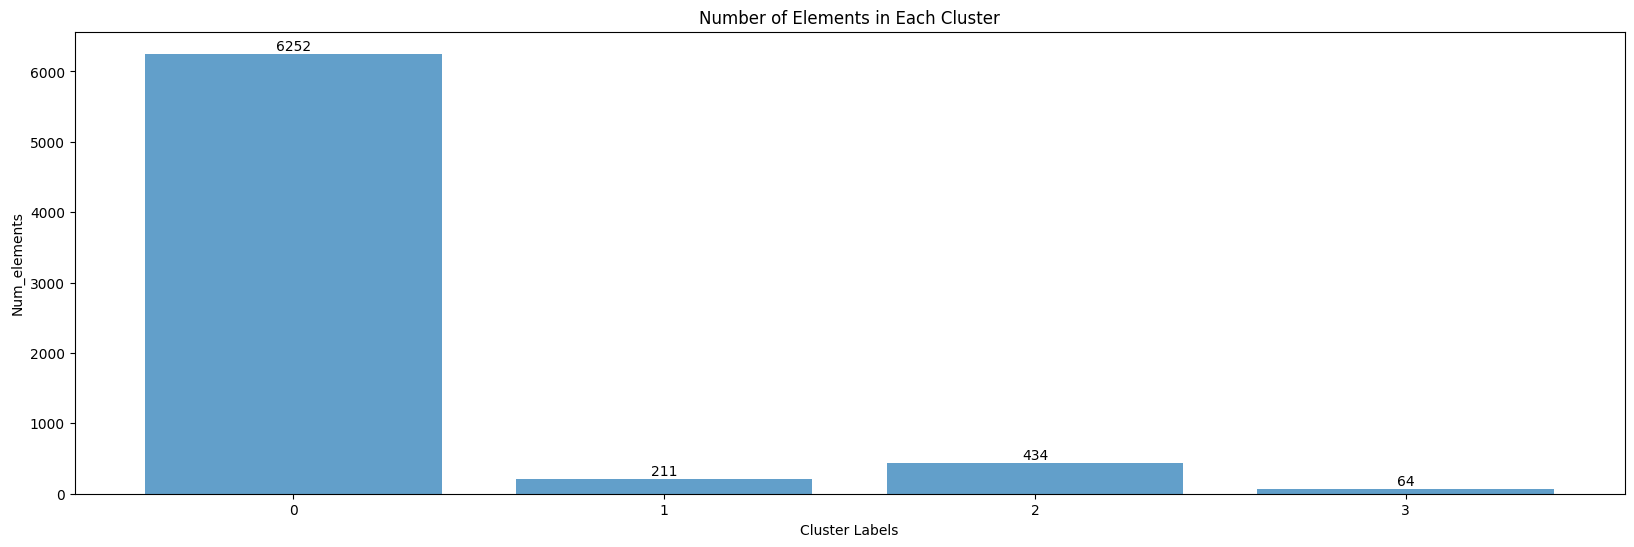

In [94]:
unique_labels, label_counts = np.unique(best_dbscan_labels, return_counts=True)

# Create a histogram
plt.figure(figsize=(20, 6))
bars = plt.bar(unique_labels, label_counts, align='center', alpha=0.7)
plt.xlabel('Cluster Labels')
plt.ylabel('Num_elements')
plt.title('Number of Elements in Each Cluster')
plt.xticks(unique_labels)

# Annotate each bar with its count total
for bar, count in zip(bars, label_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(count), ha='center', va='bottom')

plt.show()



Looks like the distribution it's  an irrgular distribuition, some outliers.

Cluster 0 size is bigger than others, it means,  have more density than onthers.
Clusters numbers 1, 2 and 3 are smaller than cluster 0 but almost close in terms of size.



3.c)Create a separate dataframe for each cluster and use pandas.DataFrame.describe to describe each. Provide a written conclusion to describe each group of patients and rank the level of urgency.

In [95]:
# Create a list to store separate dataframes for each cluster
cluster_dataframes = []

unique_clusters = np.unique(best_dbscan_labels)
for cluster_label in unique_clusters:
    if cluster_label == -1:
        continue

    cluster_df = selected_features[best_dbscan_labels == cluster_label]

    cluster_description = cluster_df.describe()

    cluster_dataframes.append((cluster_label, cluster_df, cluster_description))

for cluster_label, cluster_df, cluster_description in cluster_dataframes:
    print(f"--------------------------------------Cluster {cluster_label} Description:")
    print(cluster_description)



--------------------------------------Cluster 0 Description:
               age  blood pressure  cholesterol          bmi  hypertension  \
count  6252.000000     6252.000000  6252.000000  6252.000000        6252.0   
mean      0.528862        0.472620     0.248644     0.290187           0.0   
std       0.215012        0.208982     0.230971     0.128099           0.0   
min       0.000000        0.000000     0.000000     0.000000           0.0   
25%       0.351852        0.304762     0.097222     0.192920           0.0   
50%       0.500000        0.495238     0.201389     0.269027           0.0   
75%       0.666667        0.638095     0.298611     0.352212           0.0   
max       1.000000        1.000000     1.000000     1.000000           0.0   

       heart_disease  
count         6252.0  
mean             0.0  
std              0.0  
min              0.0  
25%              0.0  
50%              0.0  
75%              0.0  
max              0.0  
-----------------------------

**Description of group 0:**

1. Total of 6252 patients.
2. Evenly distributed, we have all ages but the mean is moderate.
3. Blood pressure is low to moderate
4. Cholesterol: Low
5. BMI: Low
6. Hypertension: No
7. Heart disease: No



**Description of Group 1:**

1. Total of 211 patients.
2. Old people
3. Blood pressure is moderate.
4. Cholesterol: Low to moderate
5. BMI: High
6. Hypertension: Yes
7. Heart disease: Yes


**Description of Group 2:**

1. Total of 434 patients.
2. Older patients
3. Blood pressure is moderate.
4. Cholesterol: Low to moderate
5. BMI: high
6. Hypertension: Yes
7. Heart disease: No

**Description of Group 3:**

1. Total of 64 patients.
2. Older patients, compared to other clusters are the oldest.
3. Blood pressure is moderate.
4. Cholesterol: Low
5. BMI:  high
6. Hypertension: Yes
7. Heart disease: Yes



**URGENCY LEVEL**

- Group 1: Elderly, hypertensive and heart disease patients, this group deserves to be the first priority for care, as they have heart disease, hypertension and are older. Added to this, the BMI is high, apparently they are critical patients

- Group 3: Elderly, hypertensive and heart disease patients. Despite being older than group 1, their cholesterol level is a little lower than group 1, for this reason they are in second priority.

- Group 2: High BMI, no heart disease only hypertension. They are old people but they can wait because they dont have heart problems.

- Group 0: Patientes without health problem also the age is moderate, young people to mid age.

